In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
adata = sc.read_loom('mese_data_Yike.loom', X_name='spliced', obs_names='cellID', var_names='GeneName', dtype='float32')
adata.obs_names_make_unique() 
adata

scanpy==1.6.0 anndata==0.7.4 umap==0.4.5 numpy==1.19.1 scipy==1.5.2 pandas==1.1.1 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


/usr/lib/python3.8/site-packages/loompy/loom_validator.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


AnnData object with n_obs × n_vars = 4403 × 18072
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds'

In [ ]:
cells_subtypes2=adata.obs['cellSubtype'].isin(['Fibroblast precursor','Late adventitial fibroblast','Late alveolar fibroblast'])
adata_subtypes2=adata[cells_subtypes2] # 仅包括'Fibroblast precursor','Late adventitial fibroblast','Late alveolar fibroblast'的数据
sc.tl.rank_genes_groups(adata_subtypes2,'cellSubtype',method='wilcoxon')
sc.pl.rank_genes_groups(adata_subtypes2, n_genes=25, sharey=False)

In [13]:
cells_subtypes3=adata.obs['cellSubtype'].isin(['Late adventitial fibroblast','Adventitial fibroblast'])
adata_subtypes3=adata[cells_subtypes3] # 仅包括'Late adventitial fibroblast','Adventitial fibroblast'的数据
sc.tl.rank_genes_groups(adata_subtypes3,'cellSubtype',method='wilcoxon')
sc.pl.rank_genes_groups(adata_subtypes3, n_genes=25, sharey=False)

(5858, 13)

In [14]:
cells_subtypes4=adata.obs['cellSubtype'].isin(['Late alveolar fibroblast','Alveolar fibroblast'])
adata_subtypes4=adata[cells_subtypes4] # 仅包括'Late alveolar fibroblast','Alveolar fibroblast'的数据
sc.tl.rank_genes_groups(adata_subtypes4,'cellSubtype',method='wilcoxon')
sc.pl.rank_genes_groups(adata_subtypes4, n_genes=25, sharey=False)

AxisArrays with keys: PCs

In [15]:
D=adata_subtypes4.uns['rank_genes_groups']['names'][:101] #.to_excel('a.xlsx')
data = pd.DataFrame(D)
data.to_excel('excels/rank_genes_group_alveolar&late.xlsx')

PairwiseArrays with keys: 

(5858, 50)

-0.007230133283883333

-0.03391415998339653

2414

4795

'Trpc6'

'Trpc6'

array([4795, 4719, 1141, ..., 1751, 2435, 2414])

'Mcam'

'Mcam'

'Mcam'

(1539, 50)

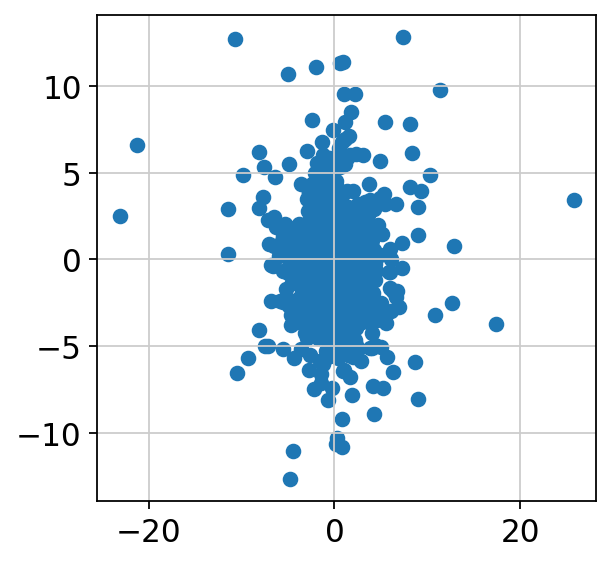

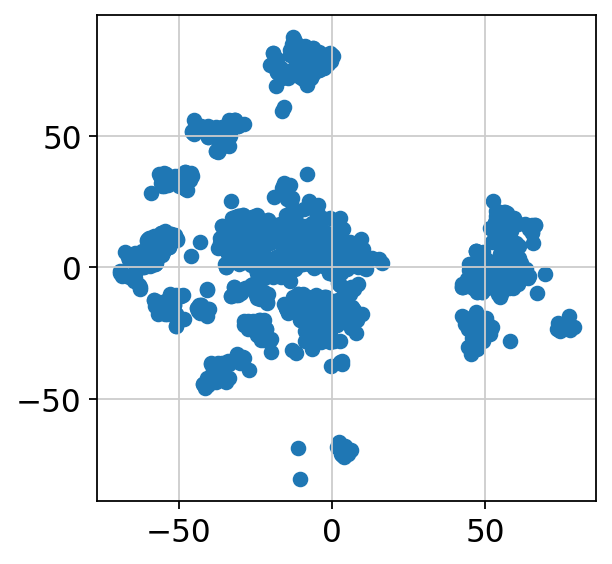